In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
import os
print(os.listdir("../input/bank-loan-modelling"))

['Bank_Personal_Loan_Modelling.xlsx']


Importing the data set and renaming the columns.

In [4]:
df = pd.read_excel('../input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx', 'Data')
df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [5]:
df.head(4) #to check first 4 rows of data set.

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


To see all the summary of data let us make one DataFrame that shows feature,dtype,Null value count,Unique count, Unique item.

In [7]:
listitem=[]
for col in df.columns:
    listitem.append([col,df[col].dtypes,df[col].isna().sum(),round((df[col].isna().sum()/len(df[col]))*100,2),df[col].nunique(),df[col].unique()])
dfdesc=pd.DataFrame(columns=['features','dtype','Null value count','Null value percentage','Unique count','Unique items'],data=listitem)
dfdesc

,features,dtype,Null value count,Null value percentage,Unique count,Unique items
0,ID,int64,0,0.0,5000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Age,int64,0,0.0,45,"[25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 5..."
2,Experience,int64,0,0.0,47,"[1, 19, 15, 9, 8, 13, 27, 24, 10, 39, 5, 23, 3..."
3,Income,int64,0,0.0,162,"[49, 34, 11, 100, 45, 29, 72, 22, 81, 180, 105..."
4,ZIPCode,int64,0,0.0,467,"[91107, 90089, 94720, 94112, 91330, 92121, 917..."
5,Family,int64,0,0.0,4,"[4, 3, 1, 2]"
6,CCAvg,float64,0,0.0,108,"[1.6, 1.5, 1.0, 2.7, 0.4, 0.3, 0.6, 8.9, 2.4, ..."
7,Education,int64,0,0.0,3,"[1, 2, 3]"
8,Mortgage,int64,0,0.0,347,"[0, 155, 104, 134, 111, 260, 163, 159, 97, 122..."
9,PersonalLoan,int64,0,0.0,2,"[0, 1]"


In [8]:
df.shape #to check no of rows and column

(5000, 14)

In [9]:
pd.set_option("display.float","{:.2f}".format)
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,45.34,20.10,73.77,93152.50,2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,1443.52,11.46,11.47,46.03,2121.85,1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,9307.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1250.75,35.00,10.00,39.00,91911.00,1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2500.50,45.00,20.00,64.00,93437.00,2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,3750.25,55.00,30.00,98.00,94608.00,3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,5000.00,67.00,43.00,224.00,96651.00,4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


# **Exploratory Data Analysis.**

Exploratory Data Analysis is a approach to analyzing the data set to summarize their main characteristics  often with visual method . Here Visualizing means we will plot different charts and graph to get valuable information about  the data set. Every Machine project starts with Eda and Exploratory data analysis is the most important part of Machine learning project.

In [10]:
df.PersonalLoan.value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

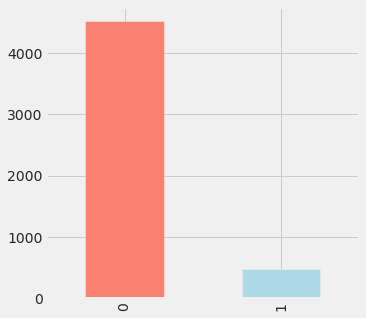

In [11]:
plt.figure(figsize=(5,5))
df.PersonalLoan.value_counts().plot(kind="bar",color=['salmon','lightblue'])

Personal Loan feature which is target variable has imblance data set which have more count of persoanl loan 0 than personal loan 1.  i.e. 9:1.
We Use Over sampling in Feature Engineering to make it balance data set.

In [12]:
categorical_val=[]
continuous_val=[]
for column in df.columns:
    print('=================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

ID : [   1    2    3 ... 4998 4999 5000]
Age : [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience : [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income : [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 

In [13]:
categorical_val

['Family',
 'Education',
 'PersonalLoan',
 'SecuritiesAccount',
 'CDAccount',
 'Online',
 'CreditCard']

In [14]:
continuous_val

['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']

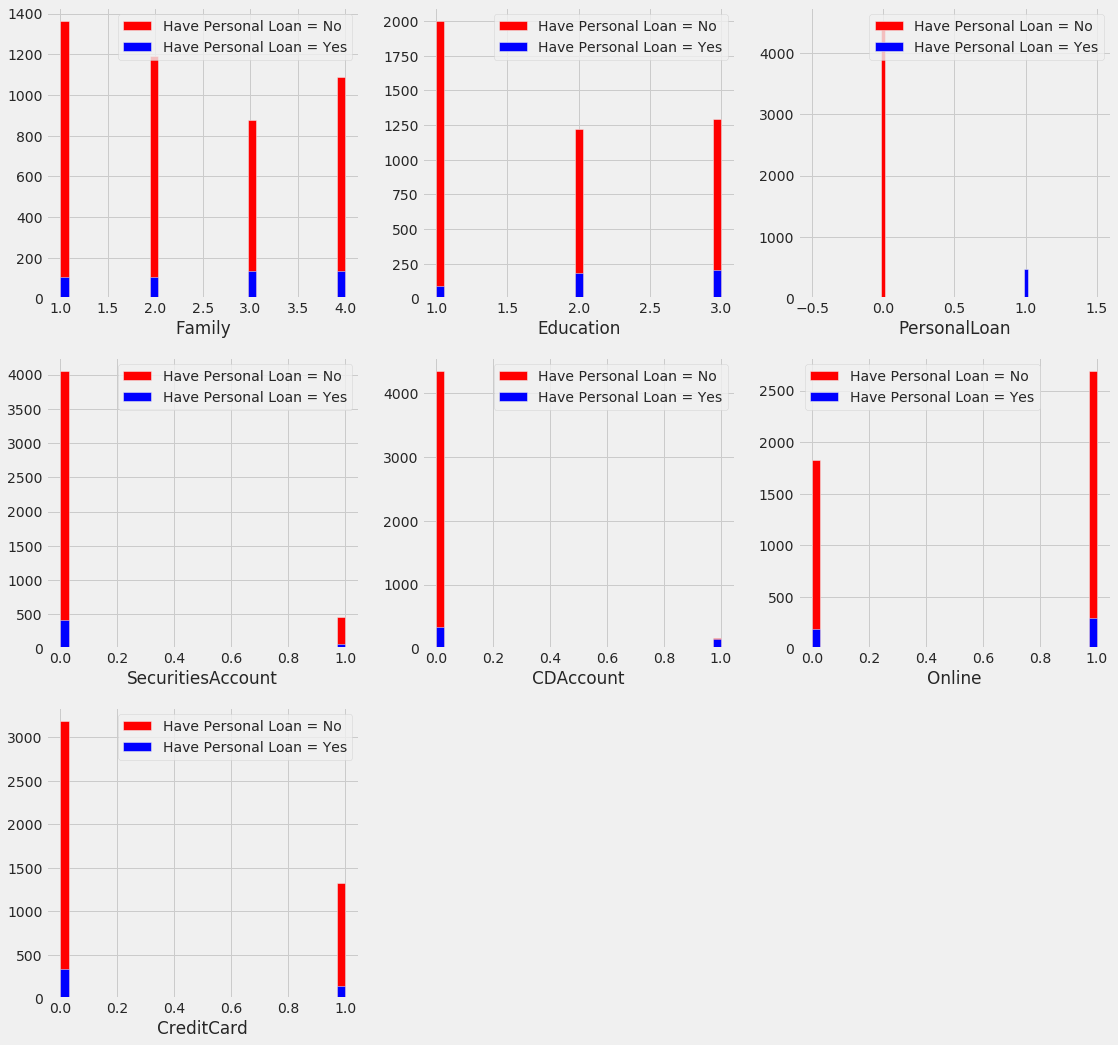

In [15]:
plt.figure(figsize=(17,17))
for i , column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    df[df["PersonalLoan"]==0][column].hist(bins=35,color='red',label='Have Personal Loan = No')
    df[df["PersonalLoan"]==1][column].hist(bins=35,color='Blue',label="Have Personal Loan = Yes")
    plt.legend()
    plt.xlabel(column)

Form the above histogram chart we can see that.
1. Family size of 3 and 4 members are tending to take Personal Loan.
2. Customer that belong to Education category 2 and 3 i.e. Graduate and Professional have taken more Persoanl Loan then the Undergraduate class.
3. Customer who does not have Security Account have taken Personal Loan .
4. Customer who does not CDAcount in this higher number of customer don't have Personal Loan . We can see that customer who have CDAcount most of them had taken Personal Loan. Here CDAccount means Certificate of Deposit.
5. Customer how use Internet Bank service also have higher count of Personal Loan then those who does not use Online Service.
6. Customer who don't have excess to Credit Card for Universal Bank are more likely to apply for PersonaL Loan.



ID                AxesSubplot(0.08,0.641765;0.255882x0.238235)
Age           AxesSubplot(0.387059,0.641765;0.255882x0.238235)
Experience    AxesSubplot(0.694118,0.641765;0.255882x0.238235)
Income            AxesSubplot(0.08,0.355882;0.255882x0.238235)
ZIPCode       AxesSubplot(0.387059,0.355882;0.255882x0.238235)
CCAvg         AxesSubplot(0.694118,0.355882;0.255882x0.238235)
Mortgage              AxesSubplot(0.08,0.07;0.255882x0.238235)
dtype: object

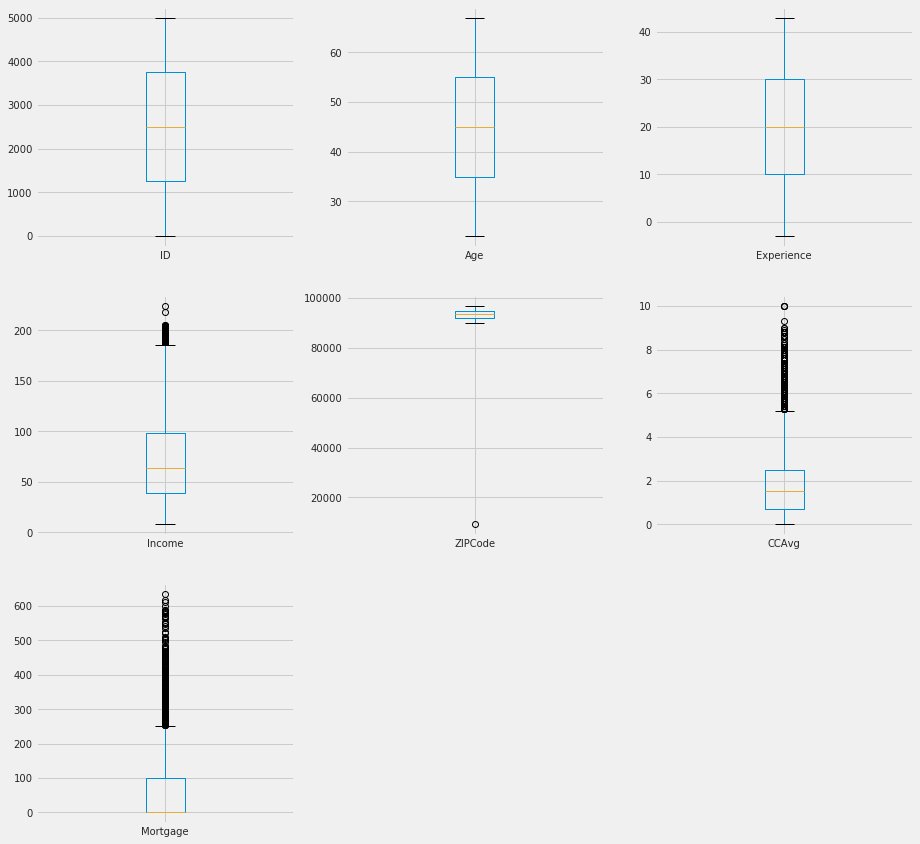

In [16]:
df[continuous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(14,14))

Income, CCAvg , Mortgage have Outlier we will deal with this in Feature Engineering.

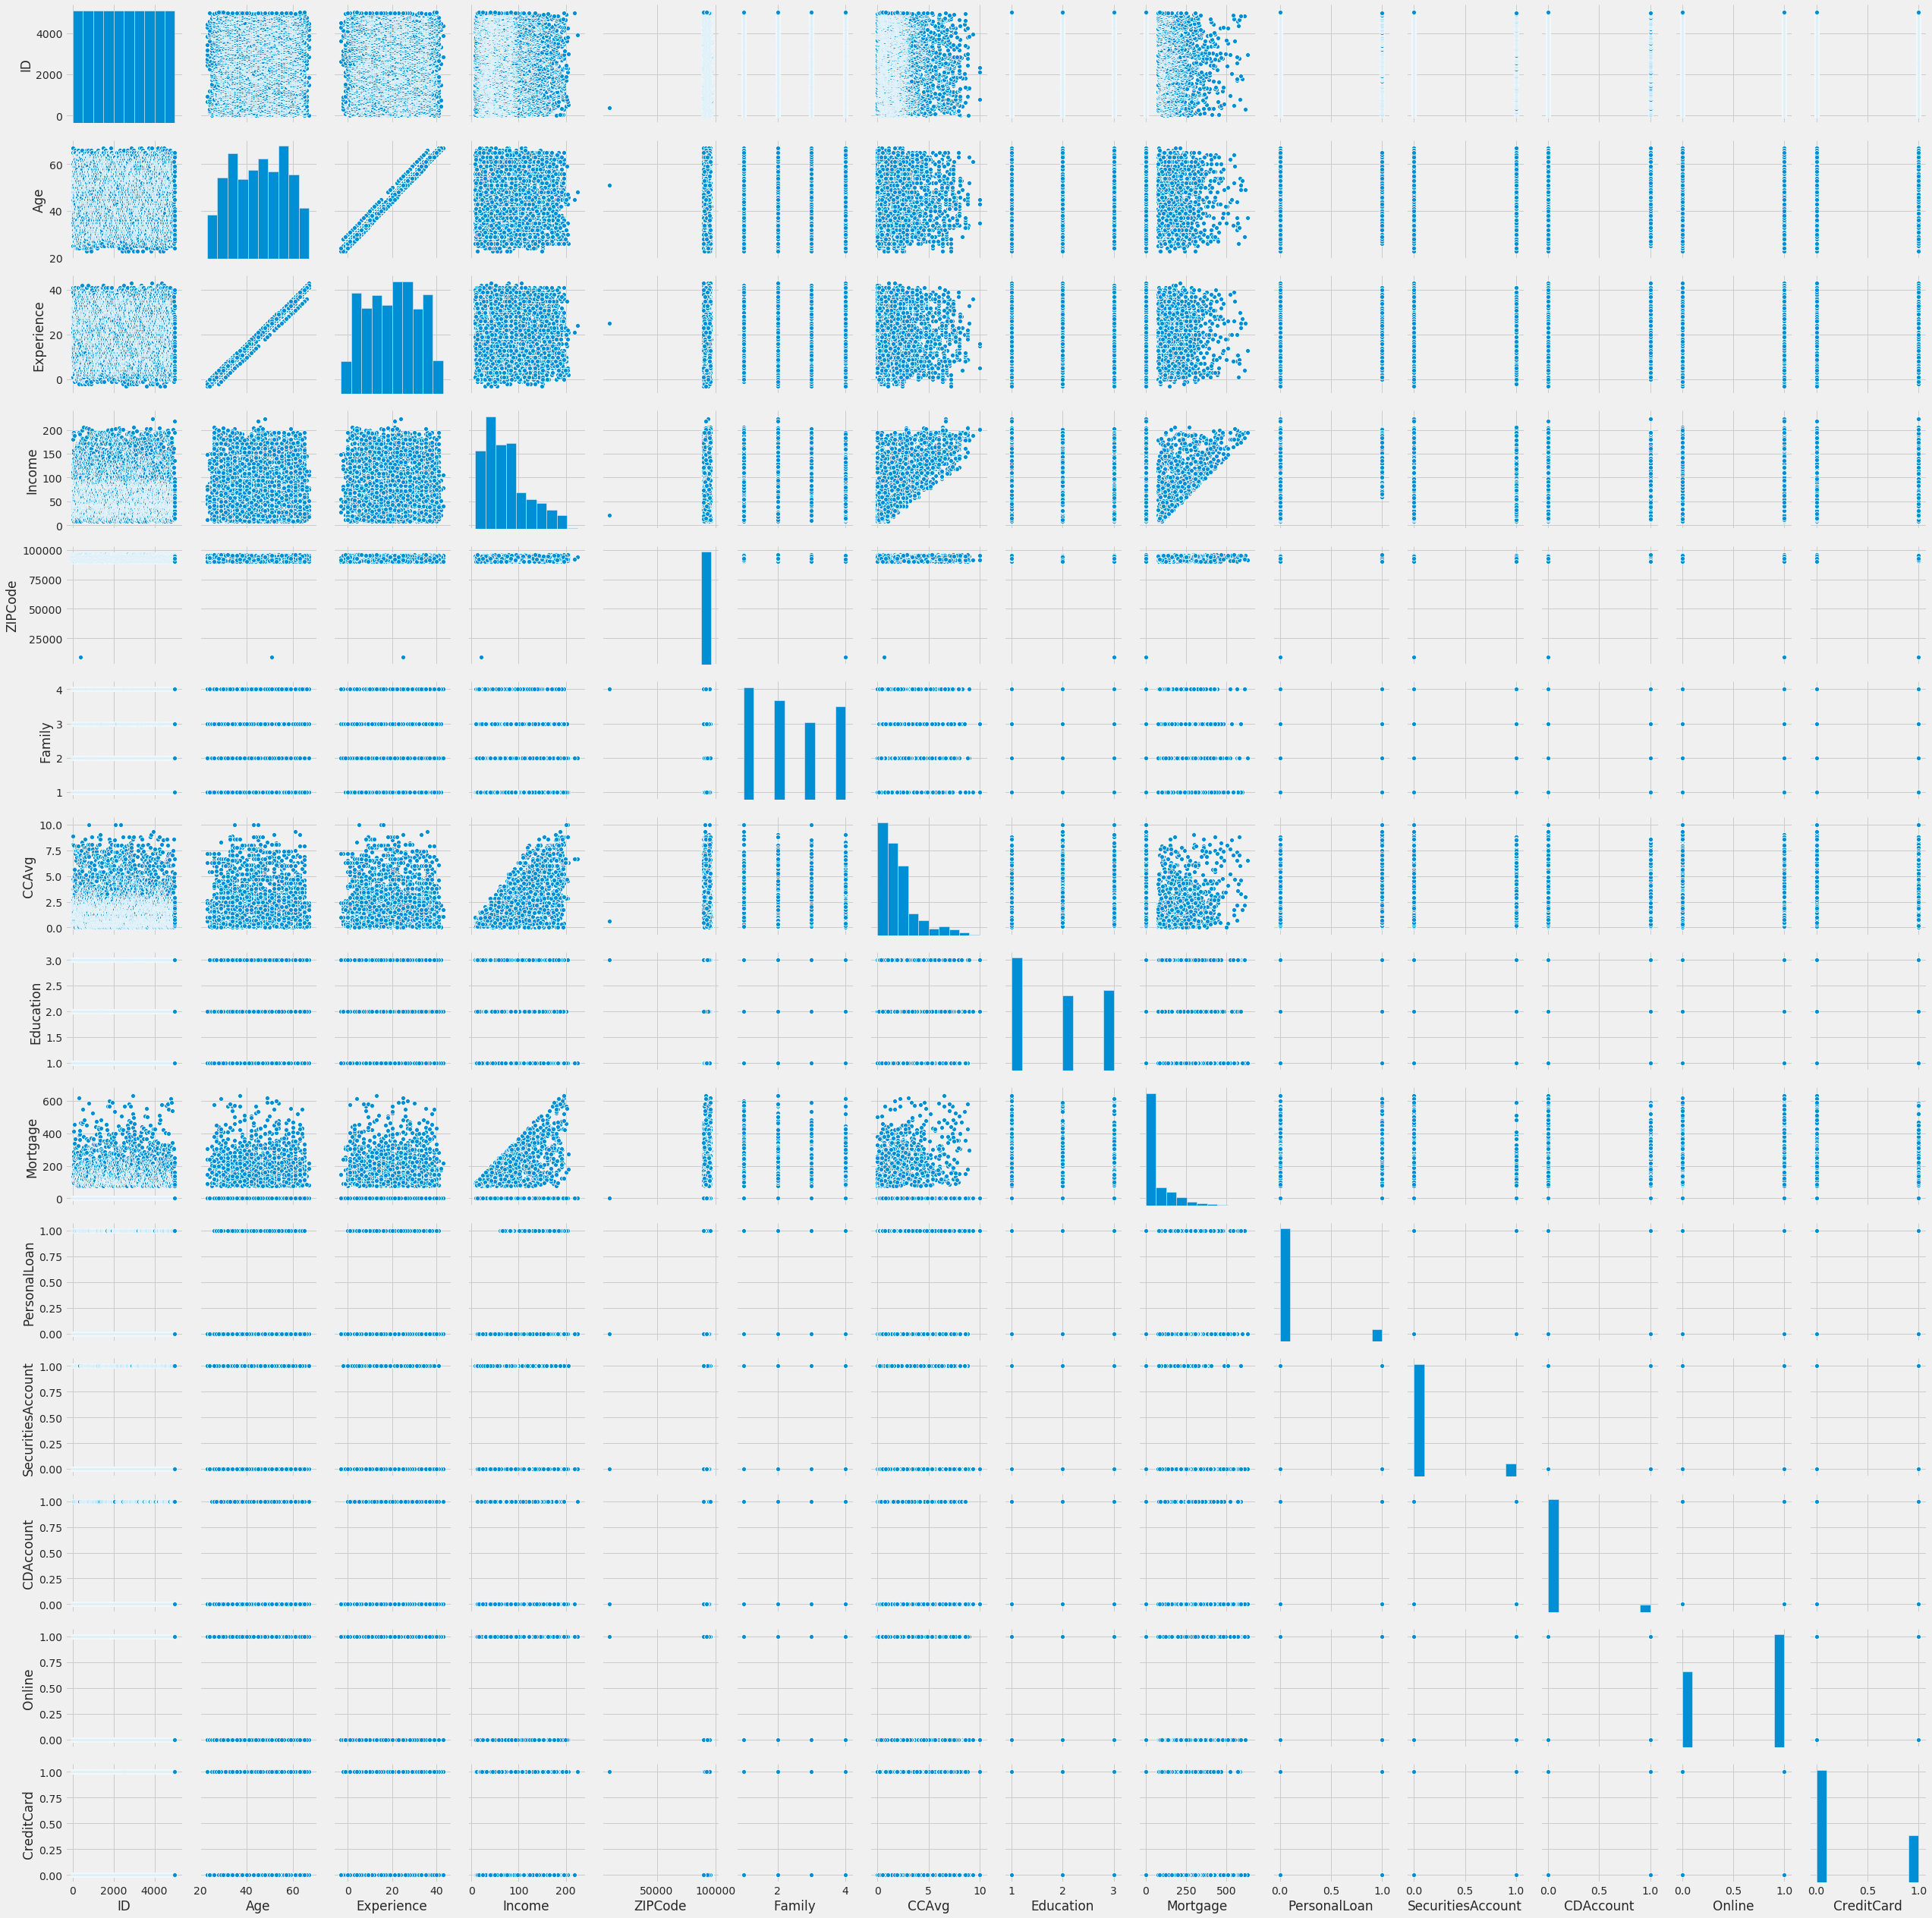

In [17]:
sns.pairplot(data=df)

From the pair plot we can see that.
1. Age and Experience both have high correlation which each other. 
2. Income,CCAvg,Mortage show positive skewness.

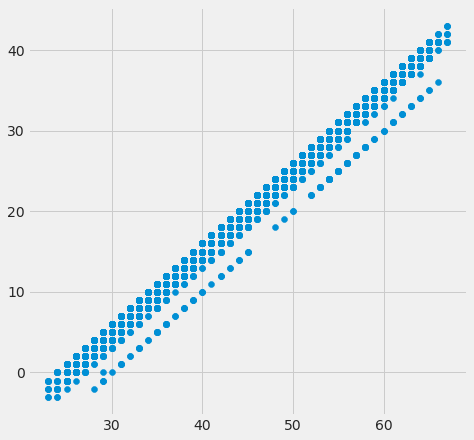

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(x='Age',y='Experience',data=df)

As we can see Age and Experience both have high correlation between each other. We have to remove any one of them in feature Engineering.

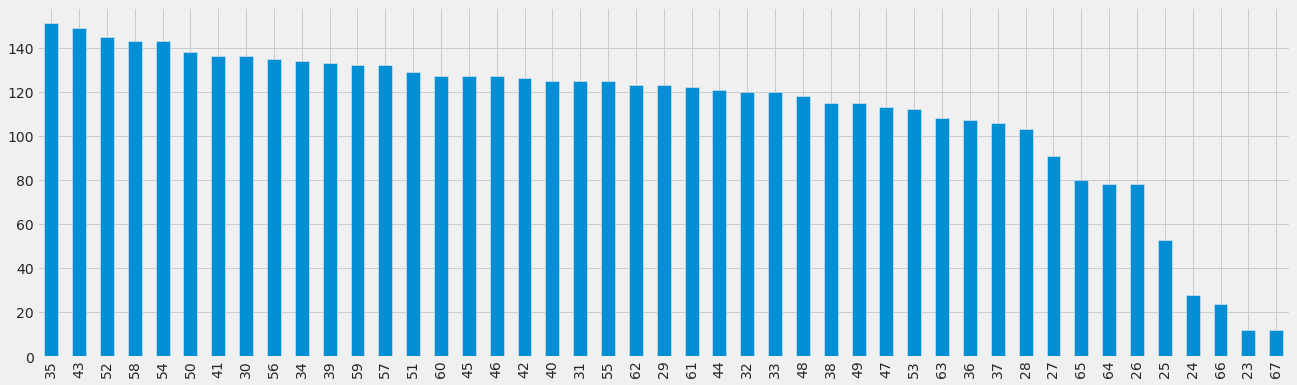

In [19]:
df["Age"].value_counts().plot.bar(figsize=(20,6))

1. 1. # **Feature Enginerring**

Feature engineering is the process of using domain knowledge to extract features from raw data set. Having a good knowledge of feature engineering  will help us get more accurate representation of underlying structure of the data and help us to improve the performance of machine learning algorithm. In Feature Engineering we have several topics like how to deal with missing values, how to deal with outliers , how do we convert categorical variables to numerical values so that model can read values easily.

In [20]:
df.describe()['Experience']

count   5000.00
mean      20.10
std       11.47
min       -3.00
25%       10.00
50%       20.00
75%       30.00
max       43.00
Name: Experience, dtype: float64

The data contain some negative Experience data point as we see min is -3.
Let us see the count of negative data points.

In [21]:
df[df['Experience']<0].count()

ID                   52
Age                  52
Experience           52
Income               52
ZIPCode              52
Family               52
CCAvg                52
Education            52
Mortgage             52
PersonalLoan         52
SecuritiesAccount    52
CDAccount            52
Online               52
CreditCard           52
dtype: int64

In [22]:
# Let us replace all the negative Experience data points by absolute value.
df['Experience']=df['Experience'].apply(abs)

In [23]:
df[df['Experience']<0].count()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

Now we don't have any negative data points in Experience.

Now we had outlier in our data set.To treat them we will be replacing all those data points whole value less than equal to LL=(Q1-1.5*IQR) and greater than equal to UL=(Q3+1.5*IQR) by LL and UL.This is known as Capping Method

In [24]:
Outlier = ['Income', 'CCAvg', 'Mortgage']
Q1=df[Outlier].quantile(0.25)
Q3=df[Outlier].quantile(0.75)
IQR=Q3-Q1
LL,UL = Q1-(IQR*1.5),Q3+(IQR*1.5)

for i in Outlier:
    df[i][df[i]>UL[i]]=UL[i];df[i][df[i]<LL[i]]=LL[i] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID                AxesSubplot(0.08,0.641765;0.255882x0.238235)
Age           AxesSubplot(0.387059,0.641765;0.255882x0.238235)
Experience    AxesSubplot(0.694118,0.641765;0.255882x0.238235)
Income            AxesSubplot(0.08,0.355882;0.255882x0.238235)
ZIPCode       AxesSubplot(0.387059,0.355882;0.255882x0.238235)
CCAvg         AxesSubplot(0.694118,0.355882;0.255882x0.238235)
Mortgage              AxesSubplot(0.08,0.07;0.255882x0.238235)
dtype: object

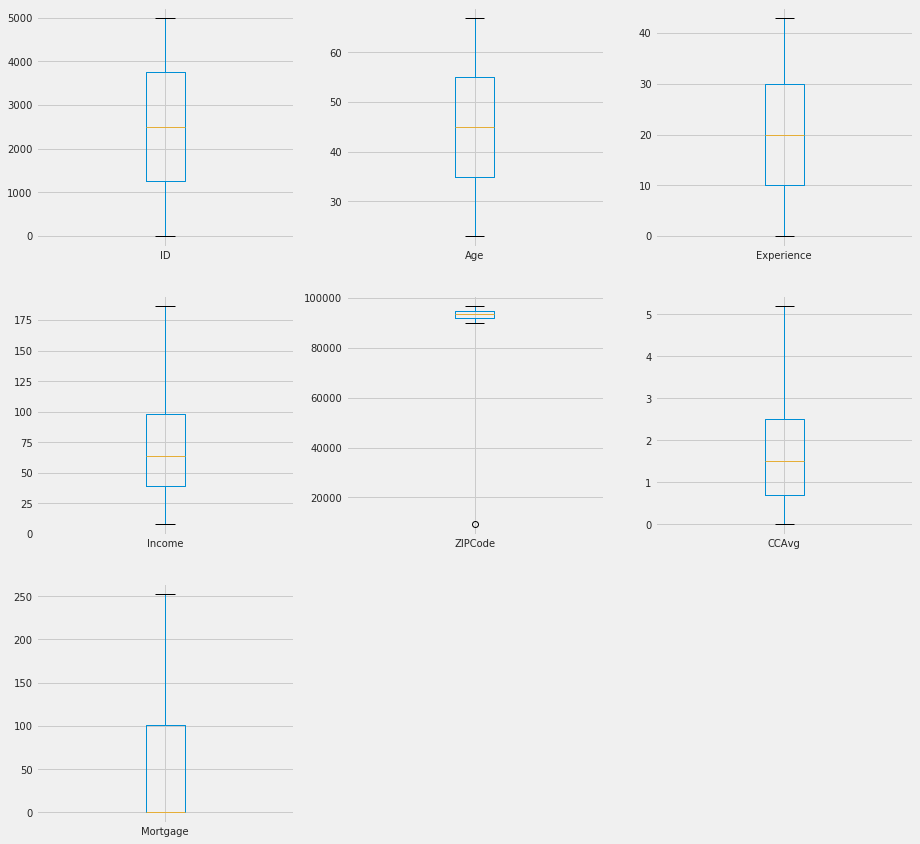

In [25]:
df[continuous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(14,14))

Now we can see that now we do not have any outlier in data set.

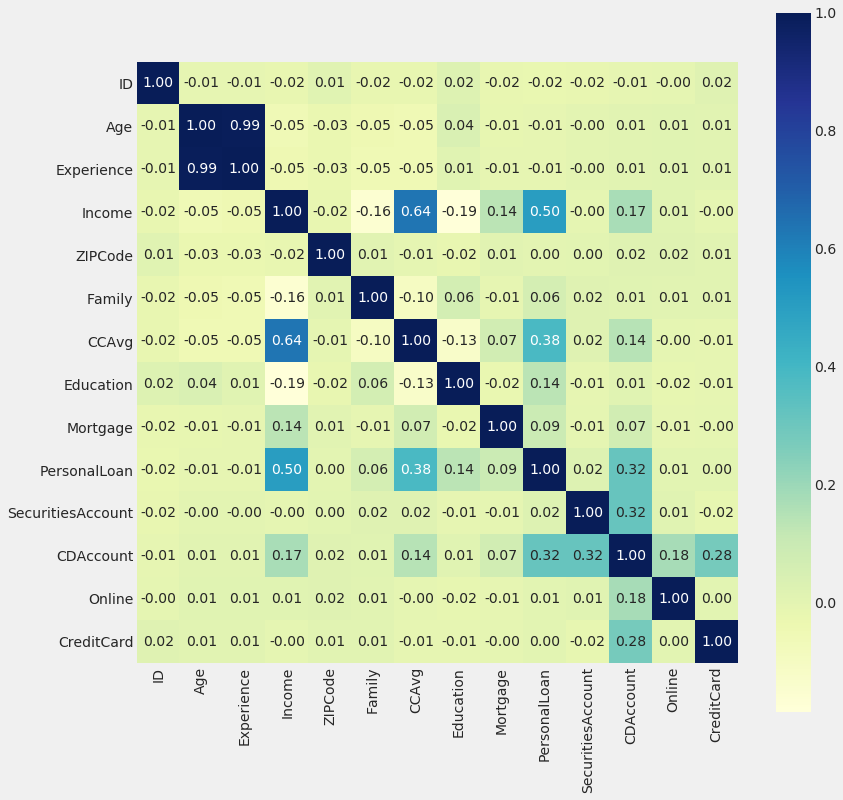

In [26]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(12,12))
ax=sns.heatmap(corr,annot=True,square=True,fmt=".2f",cmap="YlGnBu")


From look at above Heatmap
We can consider to remove Experience,ID & ZIPCODE.

In [27]:
categorical_val.remove('PersonalLoan')
print(categorical_val)

['Family', 'Education', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']


As we can see Family and Education are Ordinal Variables so we do label endcoing.

In [28]:
dataset = df.copy() # Let us create new dataset

In [29]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
label1=encode.fit_transform(df['Family'])
label2=encode.fit_transform(df['Education'])
dataset['Family']=label1
dataset['Education']=label2

In [30]:
dataset

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49.00,91107,3,1.60,0,0.00,0,1,0,0,0
1,2,45,19,34.00,90089,2,1.50,0,0.00,0,1,0,0,0
2,3,39,15,11.00,94720,0,1.00,0,0.00,0,0,0,0,0
3,4,35,9,100.00,94112,0,2.70,1,0.00,0,0,0,0,0
4,5,35,8,45.00,91330,3,1.00,1,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.00,92697,0,1.90,2,0.00,0,0,0,1,0
4996,4997,30,4,15.00,92037,3,0.40,0,85.00,0,0,0,1,0
4997,4998,63,39,24.00,93023,1,0.30,2,0.00,0,0,0,0,0
4998,4999,65,40,49.00,90034,2,0.50,1,0.00,0,0,0,1,0


In [31]:
dataset.drop(['ID','Experience','ZIPCode'],axis=1,inplace=True)

In [32]:
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
col_to_scale=['Age','Income','CCAvg','Mortgage']
dataset[col_to_scale] = ssc.fit_transform(dataset[col_to_scale])

 We have to make dataset balance. We will be using SMOTHE Method 

In [33]:
X = dataset.drop('PersonalLoan', axis=1)
y = dataset.PersonalLoan

In [34]:
PersonalLoan1=dataset[dataset['PersonalLoan']==1]
PersonalLoan0=dataset[dataset['PersonalLoan']==0]
print(PersonalLoan1.shape,PersonalLoan0.shape)

(480, 11) (4520, 11)


In [35]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(random_state=101)
X_ros,y_ros=os.fit_sample(X,y)

Using TensorFlow backend.


In [36]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))

Original dataset shape Counter({0: 4520, 1: 480})
Resampled dataset shape Counter({0: 4520, 1: 4520})


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size= 0.3, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_ros, y_ros)
y_pred=log_reg.predict(X_test)


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1383
           1       0.90      0.91      0.90      1329

    accuracy                           0.91      2712
   macro avg       0.91      0.91      0.91      2712
weighted avg       0.91      0.91      0.91      2712



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1248,  135],
       [ 122, 1207]])

In [41]:
from sklearn.metrics import (accuracy_score , f1_score , precision_score , recall_score)
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test , y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1:", f1_score(y_test,y_pred))

Accuracy: 0.9052359882005899
Precision: 0.8994038748137109
Recall: 0.908201655379985
F1: 0.9037813552976414


Let us try to use Catboost Classifier Algorithm

In [42]:
data = pd.read_excel('../input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx', 'Data')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [43]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [44]:
categorical_val=[]
continuous_val=[]
for column in data.columns:
    print('=================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

ID : [   1    2    3 ... 4998 4999 5000]
Age : [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience : [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income : [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 

ID                AxesSubplot(0.08,0.641765;0.255882x0.238235)
Age           AxesSubplot(0.387059,0.641765;0.255882x0.238235)
Experience    AxesSubplot(0.694118,0.641765;0.255882x0.238235)
Income            AxesSubplot(0.08,0.355882;0.255882x0.238235)
ZIPCode       AxesSubplot(0.387059,0.355882;0.255882x0.238235)
CCAvg         AxesSubplot(0.694118,0.355882;0.255882x0.238235)
Mortgage              AxesSubplot(0.08,0.07;0.255882x0.238235)
dtype: object

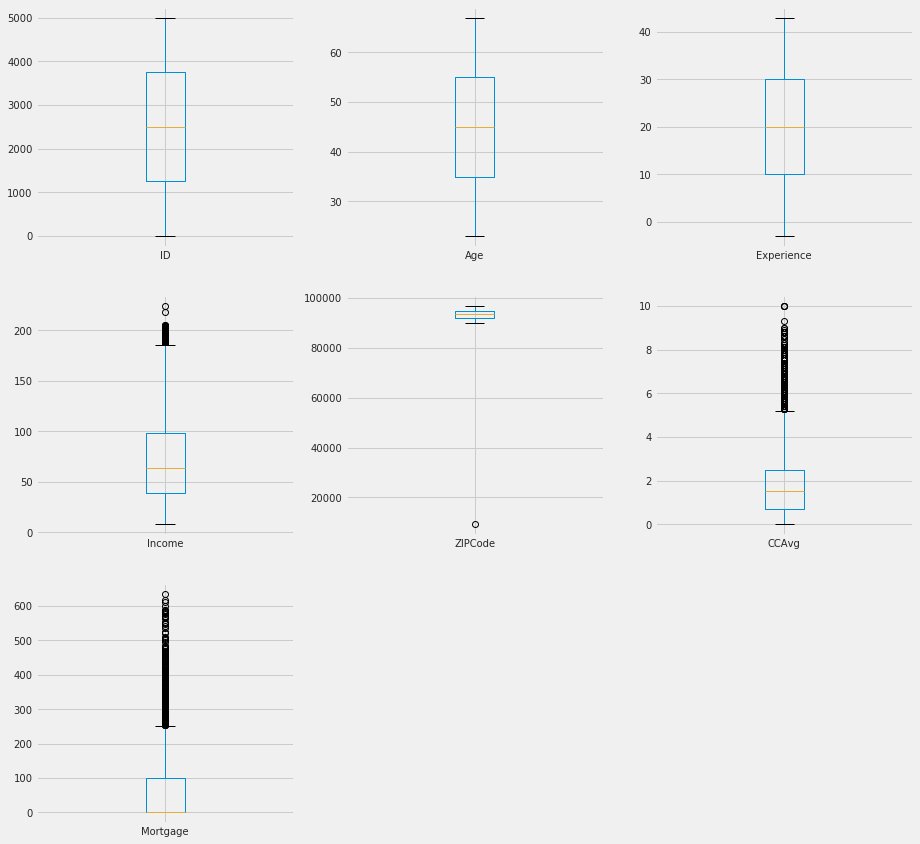

In [45]:
data[continuous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(14,14))

In [46]:
# Capping Method

Outlier = ['Income', 'CCAvg', 'Mortgage']
Q1=data[Outlier].quantile(0.25)
Q3=data[Outlier].quantile(0.75)
IQR=Q3-Q1
LL,UL = Q1-(IQR*1.5),Q3+(IQR*1.5)

for i in Outlier:
    data[i][data[i]>UL[i]]=UL[i];data[i][data[i]<LL[i]]=LL[i] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


ID                AxesSubplot(0.08,0.641765;0.255882x0.238235)
Age           AxesSubplot(0.387059,0.641765;0.255882x0.238235)
Experience    AxesSubplot(0.694118,0.641765;0.255882x0.238235)
Income            AxesSubplot(0.08,0.355882;0.255882x0.238235)
ZIPCode       AxesSubplot(0.387059,0.355882;0.255882x0.238235)
CCAvg         AxesSubplot(0.694118,0.355882;0.255882x0.238235)
Mortgage              AxesSubplot(0.08,0.07;0.255882x0.238235)
dtype: object

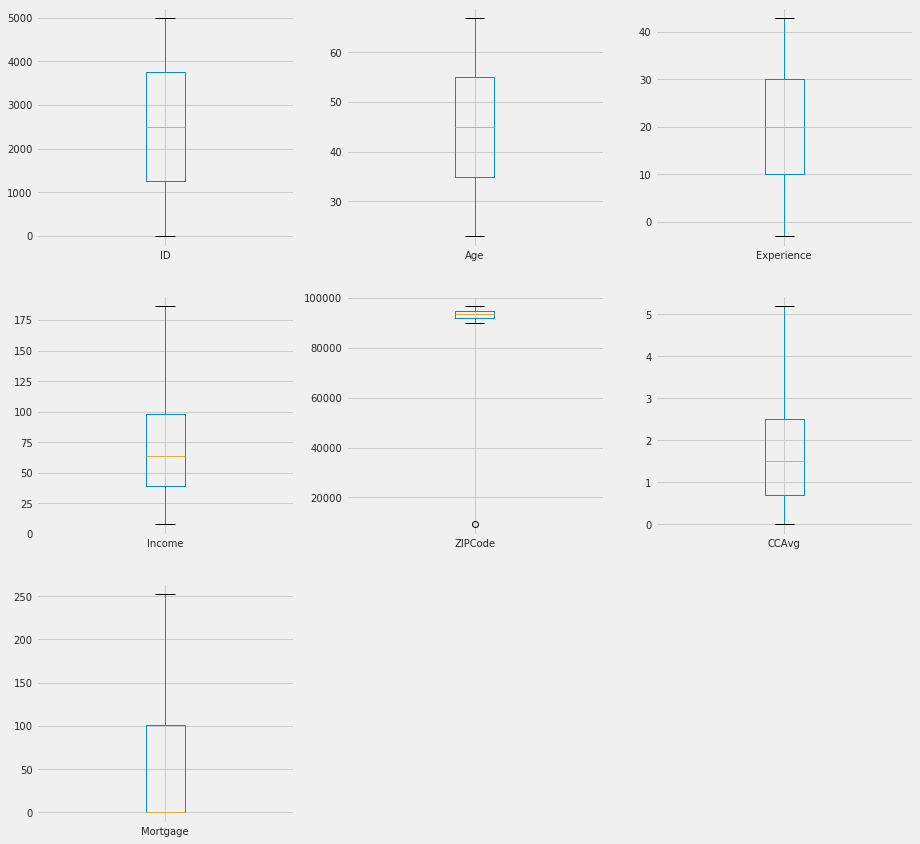

In [47]:
data[continuous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(14,14))

In [48]:
# Standardizing the variables
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
col_to_scale=['Age','Income','CCAvg','Mortgage']
data[col_to_scale] = ssc.fit_transform(data[col_to_scale])

In [49]:
data.drop(['ID','Experience','ZIPCode'],axis=1,inplace=True)
data

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,-1.77,-0.54,4,-0.16,1,-0.61,0,1,0,0,0
1,-0.03,-0.87,3,-0.23,1,-0.61,0,1,0,0,0
2,-0.55,-1.37,1,-0.57,1,-0.61,0,0,0,0,0
3,-0.90,0.58,1,0.60,2,-0.61,0,0,0,0,0
4,-0.90,-0.63,4,-0.57,2,-0.61,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.43,-0.74,1,0.05,3,-0.61,0,0,0,1,0
4996,-1.34,-1.28,4,-0.99,1,0.42,0,0,0,1,0
4997,1.54,-1.09,2,-1.05,3,-0.61,0,0,0,0,0
4998,1.72,-0.54,3,-0.92,2,-0.61,0,0,0,1,0


In [50]:
cat=['Family','Education','SecuritiesAccount','CDAccount','Online','CreditCard']

In [51]:
target_col='PersonalLoan'
X= df.loc[:,df.columns!=target_col]
y=df.loc[:,target_col]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
features=list(X_train.columns)

In [54]:
# Importing Library
!pip install catboost
from catboost import CatBoostClassifier

In [55]:
model_cb=CatBoostClassifier(iterations=1000, learning_rate=0.01, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42) # use_best_model params will make the model prevent overfitting

In [56]:
model_cb.fit(X_train,y_train,cat_features=cat,eval_set=(X_test,y_test))


0:	test: 0.9265358	best: 0.9265358 (0)	total: 64.4ms	remaining: 1m 4s
1:	test: 0.9312382	best: 0.9312382 (1)	total: 71.3ms	remaining: 35.6s
2:	test: 0.9717763	best: 0.9717763 (2)	total: 78.1ms	remaining: 26s
3:	test: 0.9815059	best: 0.9815059 (3)	total: 83.9ms	remaining: 20.9s
4:	test: 0.9801779	best: 0.9815059 (3)	total: 88.2ms	remaining: 17.6s
5:	test: 0.9766518	best: 0.9815059 (3)	total: 93.1ms	remaining: 15.4s
6:	test: 0.9755657	best: 0.9815059 (3)	total: 98.6ms	remaining: 14s
7:	test: 0.9774628	best: 0.9815059 (3)	total: 105ms	remaining: 13s
8:	test: 0.9751270	best: 0.9815059 (3)	total: 109ms	remaining: 12s
9:	test: 0.9762249	best: 0.9815059 (3)	total: 115ms	remaining: 11.4s
10:	test: 0.9756321	best: 0.9815059 (3)	total: 121ms	remaining: 10.9s
11:	test: 0.9774153	best: 0.9815059 (3)	total: 127ms	remaining: 10.5s
12:	test: 0.9775766	best: 0.9815059 (3)	total: 130ms	remaining: 9.9s
13:	test: 0.9769411	best: 0.9815059 (3)	total: 137ms	remaining: 9.62s
14:	test: 0.9788856	best: 0.9815

In [57]:
y_pred1 =model_cb.predict(X_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.91      0.95       157

    accuracy                           0.99      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test , y_pred1))

[[1342    1]
 [  14  143]]


In [60]:
print("Accuracy:",accuracy_score(y_test , y_pred1))
print("Precision:",precision_score(y_test,y_pred1))
print("Recall:",recall_score(y_test,y_pred1))
print("F1-score:",f1_score(y_test,y_pred1))

Accuracy: 0.99
Precision: 0.9930555555555556
Recall: 0.910828025477707
F1-score: 0.9501661129568106


Conclusion
As we can see by Using CatBoost Classifier we have gained 99% Accuracy. I think Catboost Classifier give us maximum accuracy.
